# **Convolution Nural Network**


Implement and evaluate a **Fully Connected Feedforward Neural Network (FCFNN)** for classifying handwritten digits (0–9) using the MNIST dataset. The network will be trained and tested, and its performance will be documented.

---

In [1]:
#Importing Libraries
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Input, Dense, Flatten,Conv2D, MaxPooling2D, Dropout
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

2025-09-15 10:10:34.911826: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-15 10:10:35.240146: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-15 10:10:38.035976: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
# Load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

In [3]:
# 2. Normalize and reshape data
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

# CNN expects (height, width, channels)
trainX = trainX[..., tf.newaxis]  
testX = testX[..., tf.newaxis]

In [4]:
#CNN Model Create
inputs = Input((28, 28, 1))  # include channel dimension for grayscale
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)

E0000 00:00:1757909440.859324    7517 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1757909440.918304    7517 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
# Train Model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, validation_split=0.1, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9273 - loss: 0.2483 - val_accuracy: 0.9877 - val_loss: 0.0463
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9793 - loss: 0.0774 - val_accuracy: 0.9905 - val_loss: 0.0350
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9856 - loss: 0.0543 - val_accuracy: 0.9882 - val_loss: 0.0464
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9892 - loss: 0.0404 - val_accuracy: 0.9910 - val_loss: 0.0414
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9914 - loss: 0.0320 - val_accuracy: 0.9875 - val_loss: 0.0514



✅ Test Accuracy: 0.9883


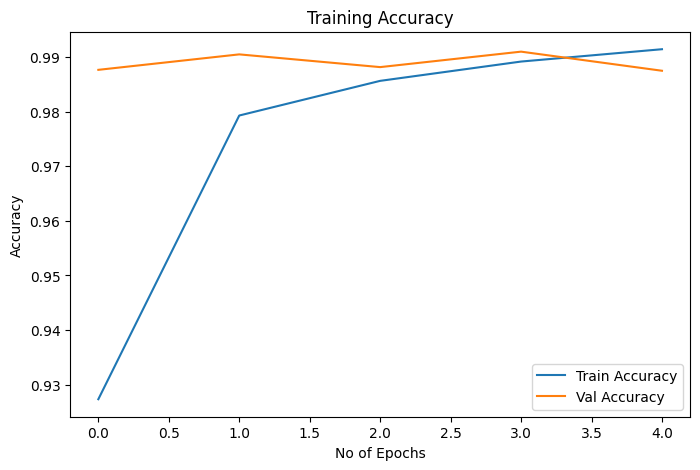

In [6]:

# Evaluate on test set
test_loss, test_acc = model.evaluate(testX, testY, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")


# Plot training history
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.savefig("training_accuracy.png")
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


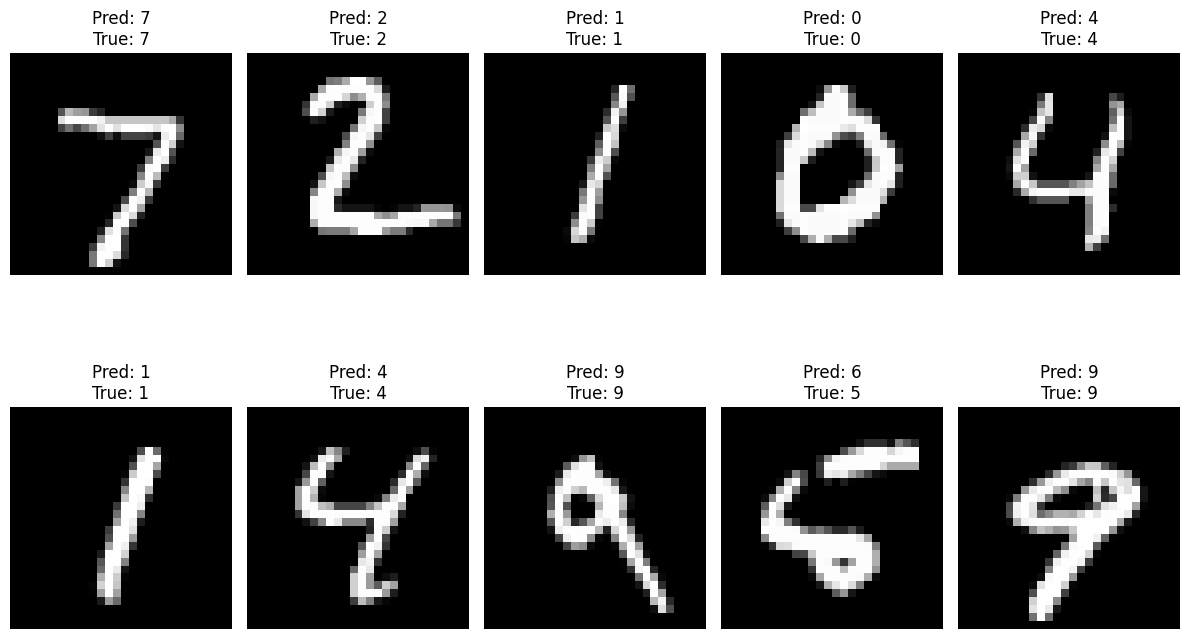

In [7]:
# Predict on test set
predictions = model.predict(testX)
predicted_labels = np.argmax(predictions, axis=1)

# Show 20 test images with predicted labels in a grid
plt.figure(figsize=(12, 8))

for i in range(10):
    plt.subplot(2, 5, i+1)  # 2 rows, 5 columns
    plt.imshow(testX[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {testY[i]}")
    plt.axis('off')

plt.tight_layout()
plt.savefig("test_predictions.png")
plt.show()
